In [1]:
from private.hypergraph import Hypergraph, hg_to_mol
from grammar_generation import random_produce

from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from copy import deepcopy
import pickle5 as pickle
import torch
from os import listdir

In [2]:
expr_name_dict = dict()
expr_name_dict['polymer_117motif'] = 'grammar-log/log_117motifs'
expr_name_dict['iso'] = 'grammar-log/log_iso'
expr_name_dict['acrylates'] = 'grammar-log/log_acy'
expr_name_dict['chain_extender'] = 'grammar-log/log_ce'

expr_names = list(expr_name_dict.keys())
generated_mols = dict()
for expr_name in expr_names:
    print('dealing with {}'.format(expr_name))
    ckpt_list = listdir(expr_name_dict[expr_name])
    max_R = 0
    max_R_ckpt = None
    for ckpt in ckpt_list:
        if 'grammar' in ckpt:
            curr_R = float(ckpt.split('_')[4][:-4])
            if curr_R > max_R:
                max_R = curr_R
                max_R_ckpt = ckpt
    print('loading {}'.format(max_R_ckpt))
    with open('{}/{}'.format(expr_name_dict[expr_name], max_R_ckpt), 'rb') as fr:
        grammar = pickle.load(fr)
    for i in range(8):
        mol, _ = random_produce(grammar)
        if expr_name not in generated_mols.keys():
            generated_mols[expr_name] = [mol]
        else:
            generated_mols[expr_name].append(mol)


dealing with polymer_117motif
loading best_grammar_epoch_34_1.2933534609346415.pkl
COC(=O)c1nc2c(s1)-c1scnc1C2(C)C
CC(=O)c1ccc2c(c1)N(C)c1ccccc1S2
COC(=O)c1ccc(C(F)(F)F)n1C
COC(=O)c1cccc2nc3c4ccccc4c4ccccc4c3nc12
COc1ccc2c(c1)C(=O)N(C)C2=O
COC(=O)c1cccc2c1C(F)(F)c1sc(c3c1C(=O)N(C)C3=O)C2(F)F
C#Cc1nc2c(C)c3c(ncn3C)c(C)c2n1C
COC(=O)c1cc(CNc2ccc3c(c2)n(C)c2c4ccccc4n(C)c32)cc2c(=O)c3c4ccsc4c4sc(c1)cc4c3c2=O
dealing with iso
loading best_grammar_epoch_52_0.8909308481417055.pkl
O=C=NCc1ccc(N=C=O)c(N=C=O)c1
O=C=NC1=CC=CCC(C2CCCCCCCCCCCCCCCCCCCCCCCC2)=C1
CC1=CC=C2CC(=CC=C(N=C=O)C=C2CN=C=O)C=C1
CC1=CC(Cc2cccc(CN=C=O)c2)=CC=C2C=CC3=CC=CC(N=C=O)=CC(=C(C)C=C1C2)C3
O=C=NCc1ccc(N=C=O)cc1CN=C=O
O=C=NCC1=CC2=CC=C(Cc3ccc(Cc4ccc(Cc5cccc(N=C=O)c5)c(CN=C=O)c4)c(N=C=O)c3)C=CC(=CC=C1Cc1ccc(Cc3ccc(Cc4ccc(CN=C=O)cc4)c(CN=C=O)c3)c(CN=C=O)c1)C2
CCCCCCCCCCCCCCCCCCCCCCCCCCCN=C=O
O=C=NCCCCCCCCCCCCCCCc1ccc(Cc2ccc(N=C=O)cc2)cc1CN=C=O
dealing with acrylates
loading best_grammar_epoch_26_1.2318563198913763.pkl
C=C(C)C

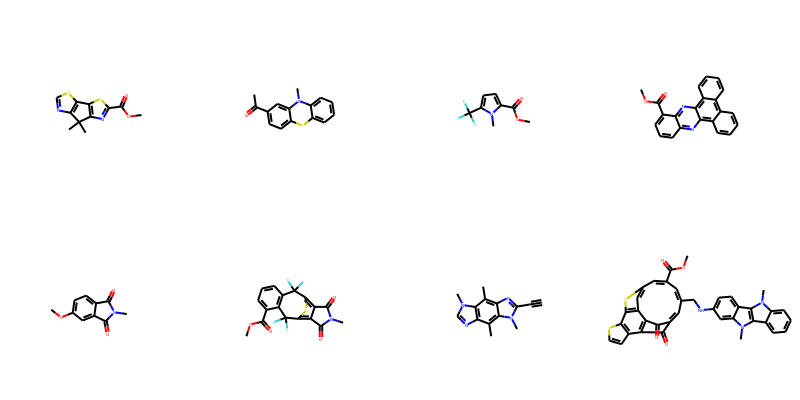

In [3]:
Chem.Draw.MolsToGridImage(generated_mols['polymer_117motif'], molsPerRow=4, subImgSize=(200,200))

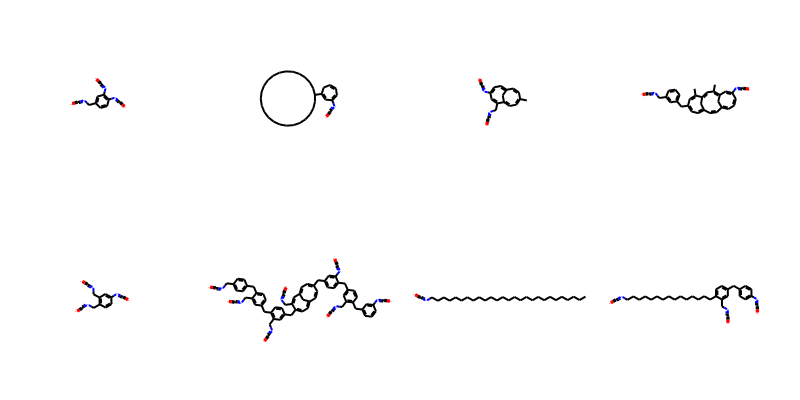

In [4]:
Chem.Draw.MolsToGridImage(generated_mols['iso'], molsPerRow=4, subImgSize=(200,200))

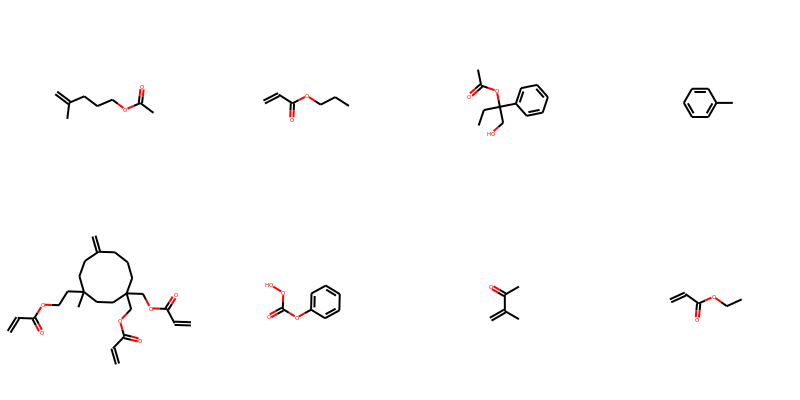

In [5]:
Chem.Draw.MolsToGridImage(generated_mols['acrylates'], molsPerRow=4, subImgSize=(200,200))

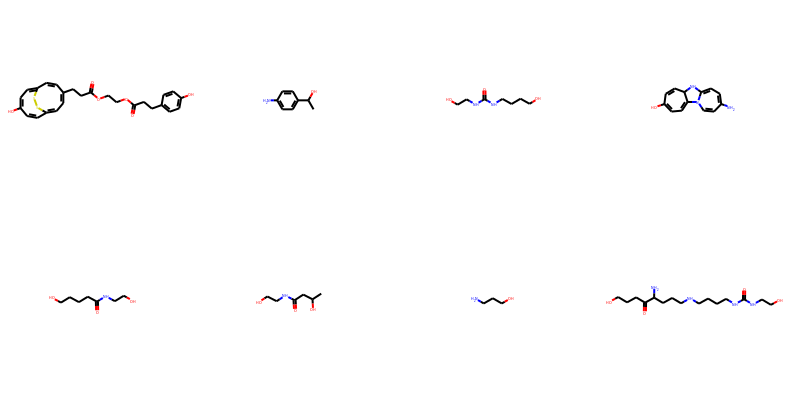

In [6]:
Chem.Draw.MolsToGridImage(generated_mols['chain_extender'], molsPerRow=4, subImgSize=(200,200))